In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_csv('Restaurant_Reviews.tsv',  delimiter='\t', quoting=3)

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [7]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Roopal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
!pip install nltk.corpus

ERROR: Could not find a version that satisfies the requirement nltk.corpus (from versions: none)
ERROR: No matching distribution found for nltk.corpus


In [9]:
!pip3 install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [8]:
df.shape

(1000, 2)

In [9]:
# Cleaning the text
corpus =[]
ps = PorterStemmer()
for i in range(0, df.shape[0]):
    #remove special char
    review = re.sub(pattern='[^a-zA-Z]' , repl = ' ', string = df['Review'][i])
    #lower case
    review = review.lower()
    #words
    words = review.split()
    #remove stopwords
    review_words = [word for word in words if word not in set(stopwords.words('english'))]
    #stemming (base words)
    words = [ps.stem(word) for word in review_words]
    review = ' '.join(words)
    corpus.append(review)


In [10]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [11]:
len(corpus)

1000

In [12]:
df[df['Liked']==1].index

Int64Index([  0,   3,   4,   8,   9,  10,  13,  16,  21,  22,
            ...
            891, 894, 895, 896, 897, 899, 901, 907, 909, 922],
           dtype='int64', length=500)

In [13]:
liked_words = []
for i in list(df[df['Liked']==1].index):
    liked_words.append(corpus[i])
liked_words[0:10]

['wow love place',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'fri great',
 'great touch',
 'servic prompt',
 'tri cape cod ravoli chicken cranberri mmmm',
 'highli recommend',
 'food amaz',
 'servic also cute']

In [14]:
unliked_words = []
for i in list(df[df['Liked']==0].index):
    unliked_words.append(corpus[i])
unliked_words[0:10]

['crust good',
 'tasti textur nasti',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'waitress littl slow servic']

In [15]:
liked = ''
unliked = ''
for i in range(0,3):
    liked+=liked_words[i]    
    unliked+=unliked_words[i]
liked

'wow love placestop late may bank holiday rick steve recommend loveselect menu great price'

In [28]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  error: subprocess-exited-with-error
  
  Running setup.py install for wordcloud did not run successfully.
  exit code: 1
  
  [20 lines of output]
  running install
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.10
  creating build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-3.10\wordcloud
  UPDATING build\lib.win-amd64-3.10\wordcloud/_

In [41]:
from wordcloud import WordCloud
wordcloud1 = WordCloud().generate(liked)

ModuleNotFoundError: No module named 'wordcloud'

In [16]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [18]:
y = df['Liked'].values
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (800, 5634), X_test size: (200, 5634)


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [23]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [24]:
cv = cross_val_score(nb_classifier, X, y,scoring ='f1', cv=10)
print('avg f1 score for MNB: {}'.format(round(cv.mean(),3)))
print('std :{}'.format(round(cv.std(),3)))

avg f1 score for MNB: 0.784
std :0.045


In [26]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [27]:
#aacuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, nb_y_pred)

In [28]:
print('accuracy score : {}'.format(score))

accuracy score : 0.775


In [32]:
print(classification_report(y_test,nb_y_pred ))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        97
           1       0.77      0.81      0.79       103

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



In [29]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
nb_cm

array([[72, 25],
       [20, 83]], dtype=int64)

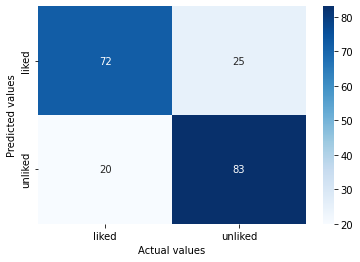

In [30]:
sns.heatmap(data = nb_cm,  annot=True, cmap="Blues",xticklabels=['liked', 'unliked'], yticklabels=['liked', 'unliked'])
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
plt.show()

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X_train, y_train, scoring='f1', cv = 10)
print('avg f1 score for DT: {}'.format(round(cv.mean(),3)))
print('std :{}'.format(round(cv.std(),3)))

avg f1 score for DT: 0.67
std :0.051


In [35]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.78      0.71        97
           1       0.74      0.59      0.66       103

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.70      0.69      0.68       200



<AxesSubplot:>

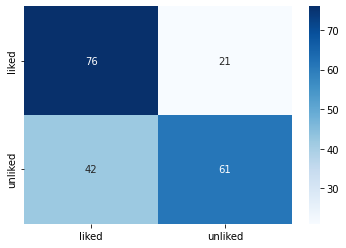

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm,  annot=True, cmap="Blues",xticklabels=['liked', 'unliked'], yticklabels=['liked', 'unliked'])

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
cv = cross_val_score(rf, X_train, y_train, scoring='f1', cv=10)
print('avg f1 score for RF: {}'.format(round(cv.mean(),3)))
print('std :{}'.format(round(cv.std(),3)))

avg f1 score for RF: 0.666
std :0.042


In [42]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73        97
           1       0.82      0.50      0.62       103

    accuracy                           0.69       200
   macro avg       0.72      0.69      0.68       200
weighted avg       0.73      0.69      0.67       200



<AxesSubplot:>

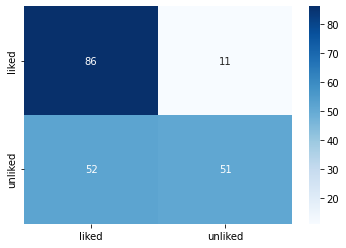

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm,  annot=True, cmap="Blues",xticklabels=['liked', 'unliked'], yticklabels=['liked', 'unliked'])

In [44]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', nb_classifier)], weights=[2,1])
cv = cross_val_score(vc, X_train, y_train, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model: 0.67 ---
Standard Deviation: 0.049


In [59]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha = 0.0
for i in np.arange(0.1, 1.1, 0.1):
    temp_classifier = MultinomialNB(alpha = i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    temp_acc = accuracy_score(y_test,temp_y_pred )
    print('alpha: {}, acc:{}'.format(i, temp_acc))
    if(temp_acc>best_accuracy):
        best_accuracy = temp_acc
        alpha= i
print('best acc: {}, alpha:{}'.format(best_accuracy, alpha))

alpha: 0.1, acc:0.785
alpha: 0.2, acc:0.78
alpha: 0.30000000000000004, acc:0.78
alpha: 0.4, acc:0.785
alpha: 0.5, acc:0.775
alpha: 0.6, acc:0.78
alpha: 0.7000000000000001, acc:0.78
alpha: 0.8, acc:0.775
alpha: 0.9, acc:0.775
alpha: 1.0, acc:0.775
best acc: 0.785, alpha:0.1


In [60]:
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(X_train, y_train)


MultinomialNB(alpha=0.1)

In [63]:
#predict
def prdict_review(test_review):
      #remove special char
    review = re.sub(pattern='[^a-zA-Z]' , repl = ' ', string = test_review)
    #lower case
    review = review.lower()
    #words
    words = review.split()
    #remove stopwords
    review_words = [word for word in words if word not in set(stopwords.words('english'))]
    #stemming (base words)
    ps = PorterStemmer()
    words = [ps.stem(word) for word in review_words]
    review = ' '.join(words)
    temp = cv.transform([review]).toarray()
    return classifier.predict(temp)

In [65]:
sample = 'The food is really good here'
if prdict_review(sample):
    print('good')
else:
    print('bad')

good


In [66]:
sample = 'Food was pretty bad and the service was very slow.'
if prdict_review(sample):
    print('good')
else:
    print('bad')

bad


In [67]:
sample = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'
if prdict_review(sample):
    print('good')
else:
    print('bad')

good


In [1]:
sample = 'amazing vibe, loved food, had a great evening'
if prdict_review(sample):
    print('good')
else:
    print('bad')

NameError: name 'prdict_review' is not defined